In [14]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 12]

In [15]:
def show(img):
    flip = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    flip = flip.astype('float32')
    flip /= np.max(flip)
    plt.imshow(flip)

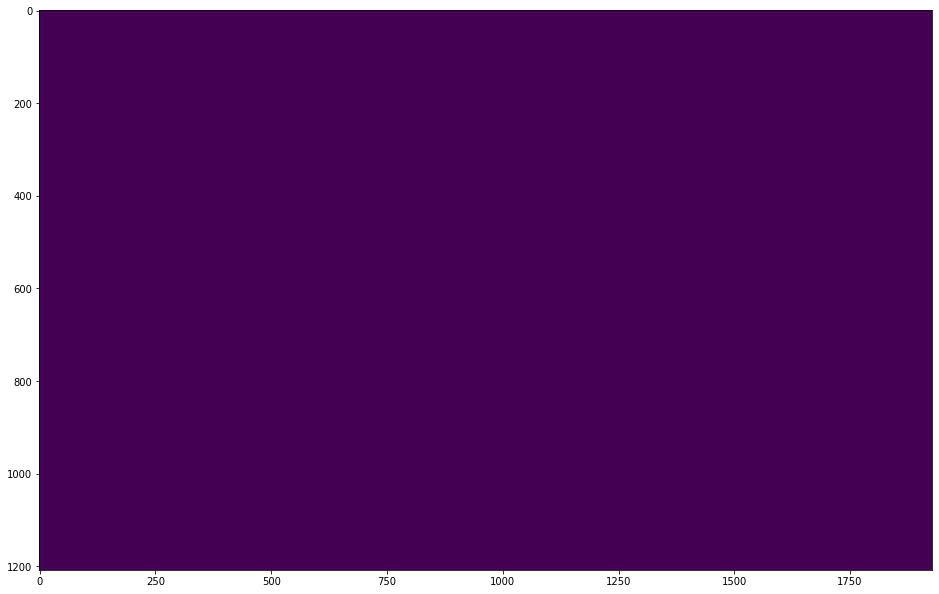

In [16]:
img = cv.imread('../accel/dev/yuv.png', cv.IMREAD_ANYCOLOR | cv.IMREAD_ANYDEPTH)
plt.imshow(img)

Image size: 1928x1208 depth: uint8


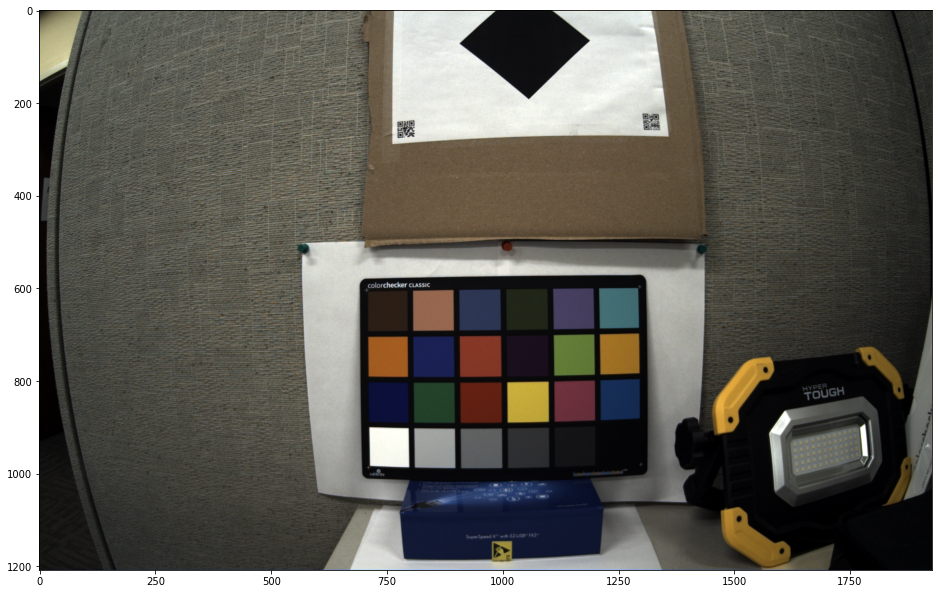

In [17]:
img2 = cv.imread('../accel/dev/img.png', -1)
print(f'Image size: {img2.shape[1]}x{img2.shape[0]} depth: {img2.dtype}')
#plt.imshow(img, cmap='gray')
show(img2)

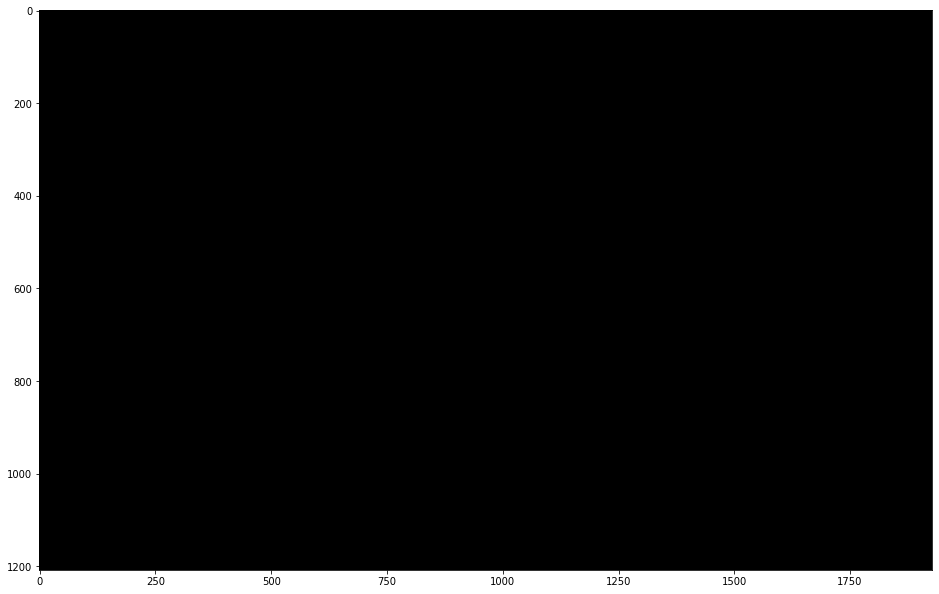

In [18]:
y = (img) & 0xFF
plt.imshow(y, cmap='gray')

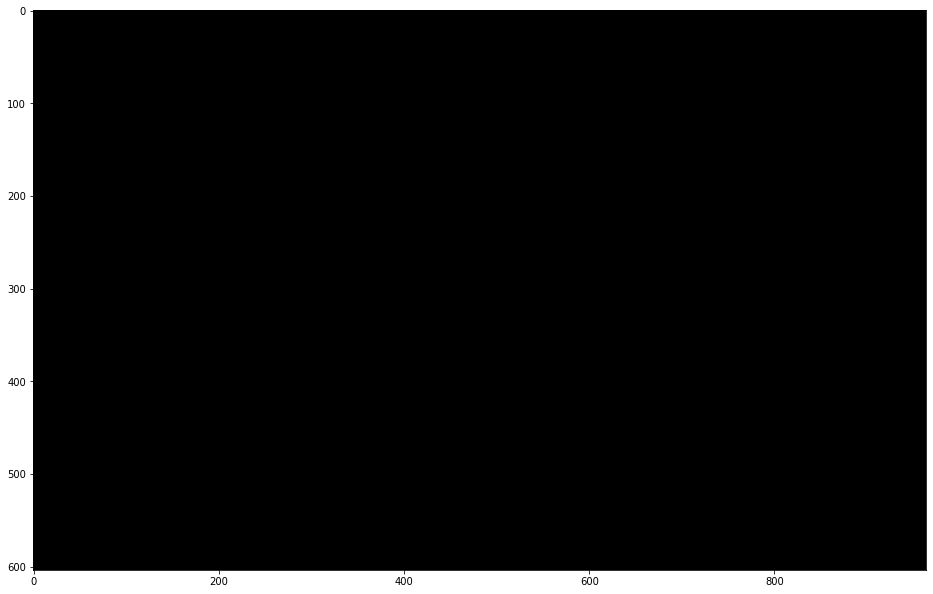

In [19]:
uv = ((img >> 8) & 0xFF).astype('uint8')
u = uv[0::2, 0::2]
v = uv[1::2, 1::2]
plt.imshow(u, cmap='gray')

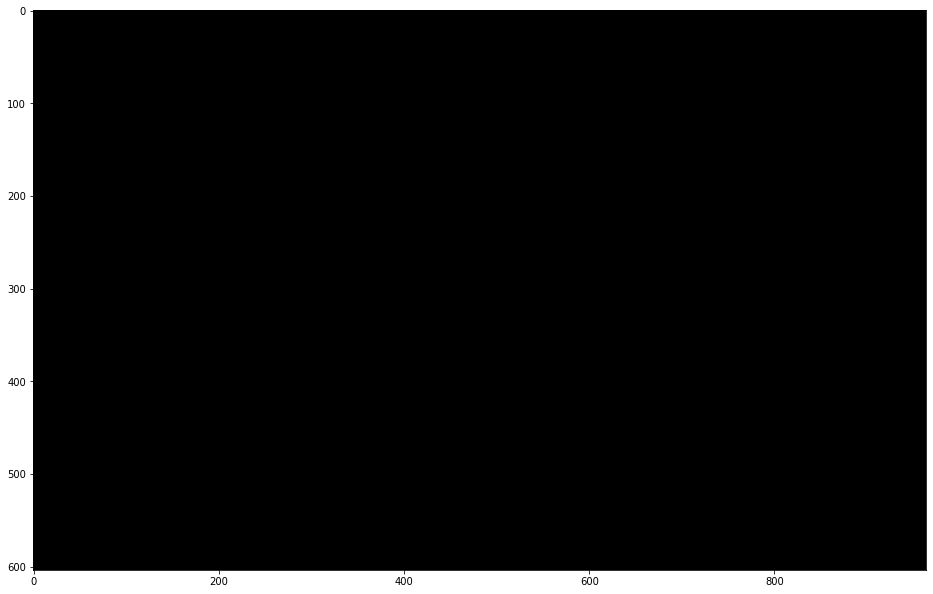

In [20]:
plt.imshow(v, cmap='gray')

# YUV format confusion
YUV_YV12 format is described here: https://www.fourcc.org/pixel-format/yuv-yv12/

It is a planar format that has the Y channel that is WxH pixels. Then the V and U channels. The V and U channels are W/2xH/2 size. OpenCV seems to convert an COLOR_BGR2YUV_YV12 to a format that is
```
+----------------------+
|                      |
|                      |
|    Y                 |
|     WxH              |
|                      |
|                      |
|                      |
|                      |
+-----------+----------+
| V         |  V       |
| W/2xH/4   |  W/2xH/4 |
|           |          |
+-----------+----------+
| U         | U        |
|W/2xH/4    | W/2xH/4  |
|           |          |
+-----------+----------+
```

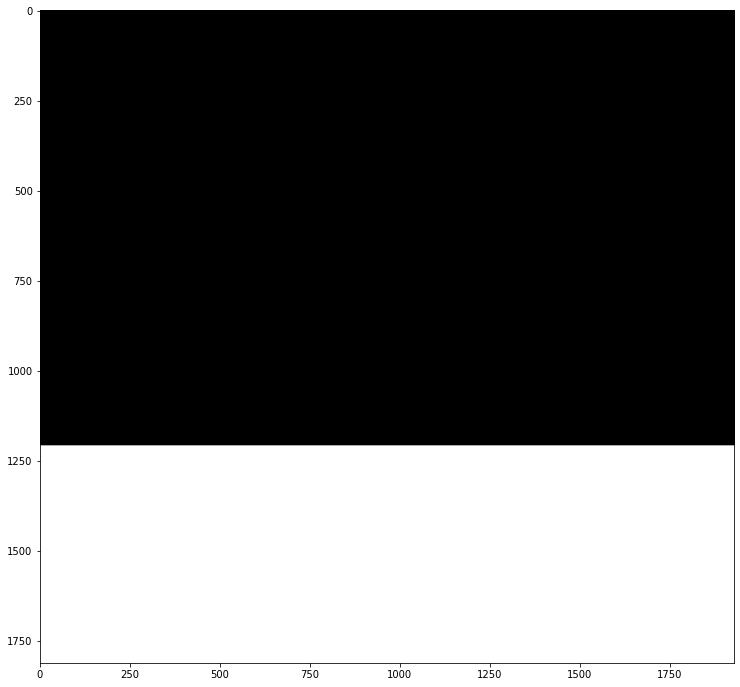

In [21]:
h, w, = img.shape
new_height = h // 2 + h
yuv = np.zeros((new_height, w), 'uint8')
yuv[0:h, :] = y
yuv[h:h+h//4, 0:w//2] = u[0::2]
yuv[h:h+h//4, w//2:w] = u[1::2]

yuv[-h//4::, 0:w//2] = v[0::2]
yuv[-h//4::, w//2:w] = v[1::2]
plt.imshow(yuv, cmap='gray')

/tmp/ipykernel_612853/3087965619.py:4: RuntimeWarning: invalid value encountered in true_divide
  flip /= np.max(flip)


True

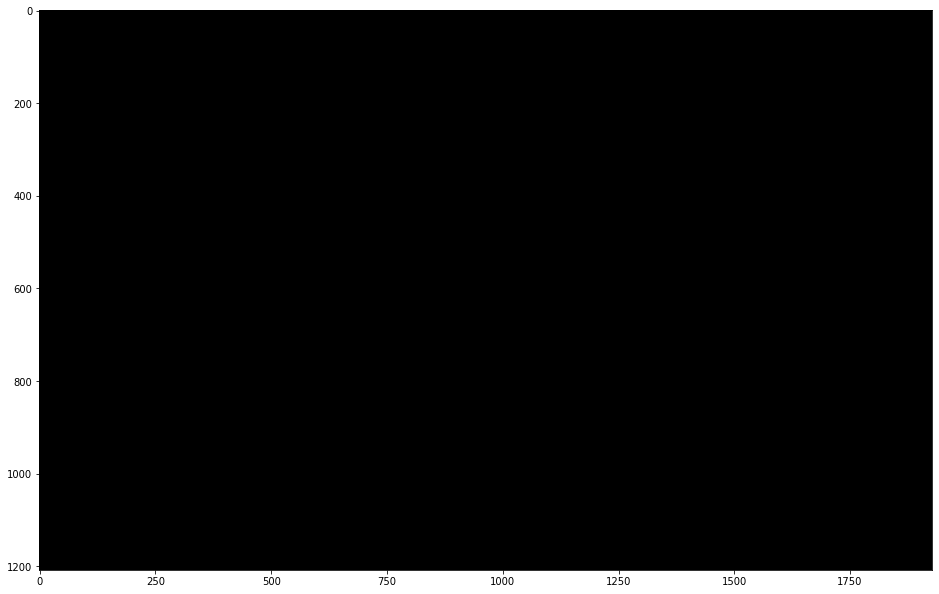

In [22]:
color = cv.cvtColor(yuv, cv.COLOR_YUV2BGR_YV12)
show(color)
cv.imwrite('hls_out.png', color)